In [73]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

plt.style.use('ggplot')

In [74]:
df = pd.read_csv('Data/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [75]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [76]:
print(df.shape)

(568454, 10)


In [77]:
df = df.head(5000)
df.shape

(5000, 10)

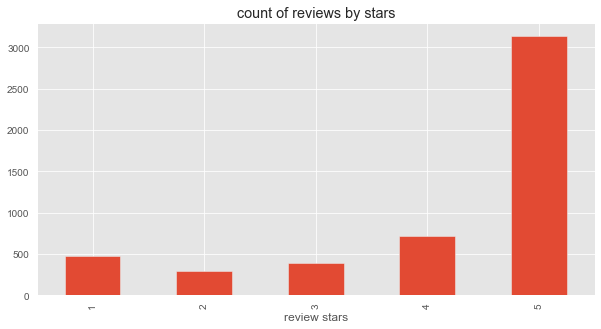

In [78]:
## EDA
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar', title='count of reviews by stars',figsize= (10,5))
ax.set_xlabel('review stars')
plt.show()



Basic NLTK

In [79]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [80]:

tokens = nltk.word_tokenize(example)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [81]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), ('Quaker', 'NNP'), ('Oats', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


In [82]:
#chunked into a sentance
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


Step 1 : VADER Sentiment Scoring

"Bag of Words " Approach :
- Stop words are removed
- Each work is scored and combined to a total score


In [83]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [84]:
sia = SentimentIntensityAnalyzer()


In [85]:
sia.polarity_scores('I am NOT VERY happy')

{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.58}

In [86]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [87]:
#Run the polarity scores entire data set
#tqdm -> Progress bar in python
res = {}
for i,r in tqdm(df.iterrows(),total=len(df)):
    txt = r['Text']
    id = r['Id']
    res[id] = sia.polarity_scores(txt)




  0%|          | 0/5000 [00:00<?, ?it/s]

In [88]:
vaders = pd.DataFrame(res).T

In [89]:
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193
4996,4997,0.026,0.764,0.210,0.9846
4997,4998,0.097,0.827,0.076,-0.0554
4998,4999,0.154,0.637,0.209,0.9078


In [90]:
vaders = vaders.merge(df,how = 'left')
#we have sentiment score and meta data for each reviews
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


Now we assume that if the score of the item the reviewer gave is 5 then its positive and 1 is negative review


#VADER RESULTS

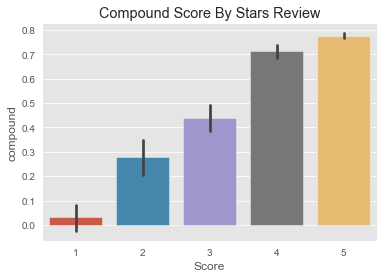

In [91]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score By Stars Review')
plt.show()

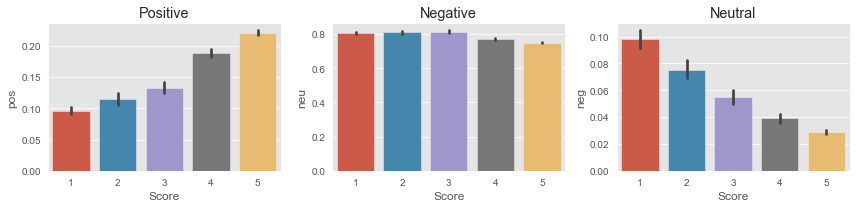

In [92]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders, x = 'Score', y = 'pos', ax =axs[0])
sns.barplot(data=vaders,x = 'Score', y = 'neu', ax=axs[1])
sns.barplot(data=vaders,x = 'Score', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()
#Here scores increase as star value increases for positive

##RoBERTa pretrained model

- use a model trained on a large corpus of data
- Transformers model accounts for the words but also the context relate to other words (sarcastic sentences cannot be detected in vader , contextual meaning , words independent on each other (relationship between two words)



In [93]:
from transformers import AutoTokenizer
#add package
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [94]:
#Hugging face - it will pull the model weights that are stored - transfer learning , we don't have to retrain the model at all
#it downloads all of the weights
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [95]:
#vader results
print(example)
sia.polarity_scores(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [96]:
#Run on Roberta Model
#encoding the text
#'pt' - pytorch
encoded_text = tokenizer(example,return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [97]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [98]:
scores = output[0][0].detach().numpy()
scores


array([ 3.1436293 , -0.71066856, -2.655896  ], dtype=float32)

In [99]:
scores_softmax = softmax(scores)
scores_softmax

array([0.9763551 , 0.02068748, 0.00295737], dtype=float32)

In [100]:
scores_dictionary = {
    'roberta_neg' : scores_softmax[0],
    'roberta_neu' : scores_softmax[1],
    'roberta_pos' : scores_softmax[2]
}
print(scores_dictionary)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957373}


Seems from the example , we can see that the review is negative as predicted by roberta and vader analysed it as neutral

##Running the encoding and pretrained model on the entire dataset


In [102]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,return_tensors='pt')
    output = model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores_softmax = softmax(scores)
    scores_dictionary = {
        'roberta_neg' : scores_softmax[0],
        'roberta_neu' : scores_softmax[1],
        'roberta_pos' : scores_softmax[2]
    }
    return scores_dictionary



In [103]:
#iterate over the dataset to calculate scores for each example
# some size of the text is too big for the roberta model to handle , we can skip those by adding try
res = {}
for i,r in tqdm(df.iterrows(),total=len(df)):
    try:
        txt = r['Text']
        id = r['Id']
        vader_result = sia.polarity_scores(txt)
        vader_res_rename = {}
        for k , v in vader_result.items():
            vader_res_rename[f"vader_{k}"] = v
        roberta_result = polarity_scores_roberta(txt)
        #combining two dictionaries
        combined_result = {**vader_result,**roberta_result}
        #break
        res[id] = combined_result
    except RuntimeError:
        print(f'Text size too long for id: {id}')


  0%|          | 0/5000 [00:00<?, ?it/s]

Text size too long for id: 83
Text size too long for id: 187
Text size too long for id: 529
Text size too long for id: 540
Text size too long for id: 746
Text size too long for id: 863
Text size too long for id: 1053
Text size too long for id: 1070
Text size too long for id: 1156
Text size too long for id: 1321
Text size too long for id: 1375
Text size too long for id: 1498
Text size too long for id: 1575
Text size too long for id: 1796
Text size too long for id: 1826
Text size too long for id: 2169
Text size too long for id: 2248
Text size too long for id: 2476
Text size too long for id: 2492
Text size too long for id: 2584
Text size too long for id: 2610
Text size too long for id: 2897
Text size too long for id: 2898
Text size too long for id: 2902
Text size too long for id: 2928
Text size too long for id: 2942
Text size too long for id: 2944
Text size too long for id: 2947
Text size too long for id: 2948
Text size too long for id: 3022
Text size too long for id: 3023
Text size too l

In [ ]:
#Roberta models are optimized to be run on a gpu

In [104]:
results_df =  pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df,how = 'left')


In [105]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Compare Scores between Models

In [106]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

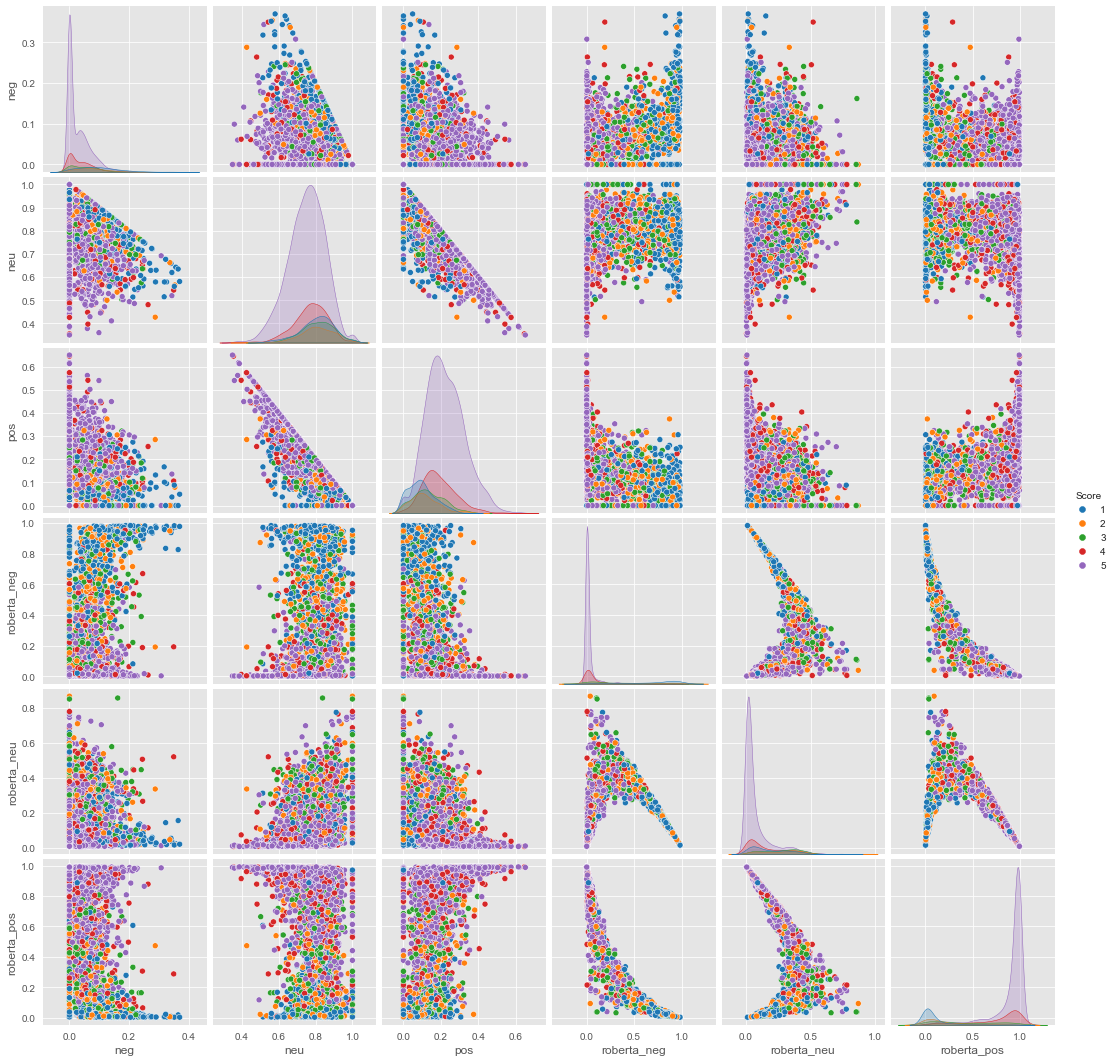

In [110]:
sns.pairplot(data = results_df , vars = ['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu','roberta_pos'] ,
             hue = 'Score',palette = 'tab10')

purple : 5 star reviews
vader : positive reviews are more to the right on 5 star reviews
roberta : pos reviews are way over to the right


## Review Examples

In [ ]:
## reviewing the examples where the score and reviews are opposite , to detect where the model goes wrong and why

In [116]:
results_df.query('Score == 1').sort_values('roberta_pos',ascending=False)['Text'].values[2]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

the sentence is very complex and nuanced , it's a sarcastic review , we can say its a negative sentance but the model classified it as postive

In [117]:
results_df.query('Score == 1').sort_values('pos',ascending=False)['Text'].values[3]

"Nice price, and glad to see a subscribe & save option on k-cups. However this was undrinkable in our opinion. Didn't seem to be too watery like another reviewer said, just a bad off taste."

The Vader model doesn't pick on the negative reviews

negative Sentiment 5 start review


In [120]:
results_df.query('Score == 5').sort_values('roberta_neg',ascending=False)['Text'].values[2]

"this gum is super sick.tatooes are killin.flavor is a spankin'.this brings back bomb diggity memories yo.peace out."

In [121]:
results_df.query('Score == 5').sort_values('neg',ascending=False)['Text'].values[1]

'I have nothing but good service ever since I started ordering from amazon.com.  Keep up the good work.'

In [123]:
#Transformers Pipeline
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
#this will automatically download default model and embeddings for the pipeline ,and run sentiment analysis

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [128]:
sentiment_pipeline('I always get good service ever since i started odering from this website but this order was not what i expected')

[{'label': 'NEGATIVE', 'score': 0.9984142780303955}]